## Question 1st:- Explain the properties of the F-distribution. 

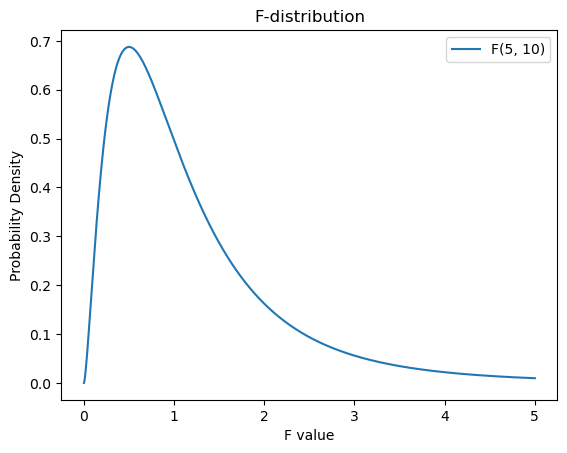

In [2]:
# The F-distribution is:

  # 1.Right-skewed: It has a long right tail.
    
  # 2.Non-negative: Values are always ≥ 0.

  # 3.Degrees of freedom: Defined by two sets of degrees of freedom (numerator 𝑑1 and denominator 𝑑2).
    
  # 4.Used in hypothesis testing: Commonly used in ANOVA and regression analysis to compare variances.

  # 5.Shape: The shape changes with the degrees of freedom; it becomes more symmetric as 𝑑1 and 𝑑2 increase.

    
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Parameters for F-distribution
df1, df2 = 5, 10  # degrees of freedom

# Generate F-distribution data
x = np.linspace(0, 5, 1000)
y = f.pdf(x, df1, df2)

# Plot
plt.plot(x, y, label=f'F({df1}, {df2})')
plt.title('F-distribution')
plt.xlabel('F value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


## Question 2nd:- In which types of statistical tests is the F-distribution used, and why is it appropriate for these tests?

In [3]:
# The F-distribution is primarily used in the following types of statistical tests:

# 1.Analysis of Variance (ANOVA):
  
    # .Purpose: Tests whether there are significant differences between group means.
    
    # .Why F-distribution?: ANOVA compares the variance between groups to the variance within groups, and the F-distribution models the ratio of these variances.

# 2.F-test for Comparing Two Variances:

    # .Purpose: Tests whether two samples come from populations with equal variances.
    
    # .Why F-distribution?: It evaluates the ratio of two sample variances, where the ratio follows an F-distribution under the null hypothesis.
    
# 3.Regression Analysis:

    # .Purpose: Tests the overall significance of a regression model.
    
    # .Why F-distribution?: In regression, the F-test checks whether the explained variance (by the model) is significantly greater than the unexplained variance (error).
    

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway

# Example: ANOVA for three groups
group1 = np.random.normal(20, 5, 30)  # Sample from population 1
group2 = np.random.normal(22, 5, 30)  # Sample from population 2
group3 = np.random.normal(25, 5, 30)  # Sample from population 3

# Perform one-way ANOVA using scipy
f_stat, p_value = f_oneway(group1, group2, group3)

# Output results
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Example ANOVA using statsmodels
data = pd.DataFrame({
    'score': np.concatenate([group1, group2, group3]),
    'group': ['Group1']*30 + ['Group2']*30 + ['Group3']*30
})

# Perform ANOVA using OLS model
model = ols('score ~ group', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)


# Why the F-distribution is appropriate:

  # The F-distribution arises naturally when comparing variances or mean squares in these tests.
    
  # It is suited to test whether the ratio of two variances (between groups/variances explained by model vs. within groups/unexplained variance) follows a specific distribution under the null hypothesis.


F-statistic: 8.38
P-value: 0.0005
               sum_sq    df         F   PR(>F)
group      405.570903   2.0  8.379138  0.00047
Residual  2105.507101  87.0       NaN      NaN


## Question 3rd:-What are the key assumptions required for conducting an F-test to compare the variances of two populations?

In [5]:
# The F-test for comparing the variances of two populations has several key assumptions:

  # 1.Independence: The two samples must be independent of each other.
    
  # 2.Normality: The populations from which the samples are drawn should follow a normal distribution.

  # 3.Ratio of variances: The test assumes that the null hypothesis is that the variances are equal (σ₁² = σ₂²).
    
import numpy as np
from scipy.stats import f

# Example: Two samples from normal distributions with different variances
np.random.seed(42)
sample1 = np.random.normal(50, 10, 30)  # Mean=50, Std=10
sample2 = np.random.normal(50, 15, 30)  # Mean=50, Std=15

# Calculate the variances of both samples
var1 = np.var(sample1, ddof=1)
var2 = np.var(sample2, ddof=1)

# F-statistic (ratio of variances)
f_stat = var1 / var2 if var1 > var2 else var2 / var1

# Degrees of freedom
df1 = len(sample1) - 1
df2 = len(sample2) - 1

# P-value from the F-distribution
p_value = 2 * min(f.cdf(f_stat, df1, df2), 1 - f.cdf(f_stat, df1, df2))

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in variances.")


F-statistic: 2.4082
P-value: 0.0209
Reject the null hypothesis: Variances are significantly different.


## Question 4th:- What is the purpose of ANOVA, and how does it differ from a t-test? 


In [6]:
# Purpose of ANOVA:
 
    # ANOVA (Analysis of Variance) is used to determine if 
     # there are statistically significant differences between the means of three or more groups.
     # It compares the variance between groups to the variance within groups to test the null hypothesis that all group means are equal.
 

# Difference from a t-test:

# t-test: Used to compare the means of two groups.

  # Independent t-test: Compares means of two independent groups.
  # Paired t-test: Compares means of two related samples.

# ANOVA: Used to compare means of three or more groups. It avoids the issue of increased Type I error that occurs when multiple t-tests are performed on the same dataset.


# Key Difference:

  # t-test compares two means**, while ANOVA compares more than two means at once.
    
  # Using multiple t-tests increases the risk of a Type I error (false positive), while ANOVA controls this by testing all means simultaneously.



import numpy as np
from scipy.stats import ttest_ind, f_oneway

# Example: Generate random data for three groups
np.random.seed(0)
group1 = np.random.normal(25, 5, 30)  # Group 1 with mean 25
group2 = np.random.normal(30, 5, 30)  # Group 2 with mean 30
group3 = np.random.normal(35, 5, 30)  # Group 3 with mean 35

# 1. Perform independent t-test (comparing just two groups)
t_stat, p_value_ttest = ttest_ind(group1, group2)
print("T-test between Group 1 and Group 2:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value_ttest:.4f}\n")

# 2. Perform one-way ANOVA (comparing all three groups)
f_stat, p_value_anova = f_oneway(group1, group2, group3)
print("ANOVA for Group 1, Group 2, and Group 3:")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value_anova:.4f}")


T-test between Group 1 and Group 2:
T-statistic: -1.0246, P-value: 0.3098

ANOVA for Group 1, Group 2, and Group 3:
F-statistic: 17.2958, P-value: 0.0000


# Question 5th:- Explain when and why you would use a one-way ANOVA instead of multiple t-tests when comparing more than two groups.

In [7]:
# When to Use a One-Way ANOVA Instead of Multiple t-tests:

  # You should use one-way ANOVA when you are comparing the means of three or more independent 
  # groups to avoid the risks associated with performing multiple t-tests.


# Why Use One-Way ANOVA Instead of Multiple t-tests:

# 1.Avoiding Type I Error Inflation:

  # When performing multiple t-tests, the probability of making a Type I error (false positive) increases with each test. For example, with a significance level of 0.05, conducting multiple tests can lead to a cumulative error rate that is much higher than 5%.
    
  # ANOVA controls this by testing all groups simultaneously, ensuring the overall significance level remains at 0.05 (or whatever level you set).

# 2.Efficient Analysis:


  # ANOVA is more efficient as it handles multiple groups in one test, instead of running multiple pairwise comparisons.
# 3.Holistic Comparison:

  # ANOVA provides a single F-statistic to determine whether at least one group mean differs significantly from the others, while multiple t-tests only compare groups two at a time without considering the overall group differences.

    
import numpy as np
from scipy.stats import ttest_ind, f_oneway

# Generate random data for three groups
np.random.seed(0)
group1 = np.random.normal(25, 5, 30)  # Group 1 with mean 25
group2 = np.random.normal(30, 5, 30)  # Group 2 with mean 30
group3 = np.random.normal(35, 5, 30)  # Group 3 with mean 35

# 1. Perform multiple t-tests (pairwise comparisons)
t_stat_12, p_value_12 = ttest_ind(group1, group2)
t_stat_13, p_value_13 = ttest_ind(group1, group3)
t_stat_23, p_value_23 = ttest_ind(group2, group3)

print("Multiple t-tests results:")
print(f"T-test between Group 1 and Group 2: P-value = {p_value_12:.4f}")
print(f"T-test between Group 1 and Group 3: P-value = {p_value_13:.4f}")
print(f"T-test between Group 2 and Group 3: P-value = {p_value_23:.4f}\n")

# 2. Perform one-way ANOVA
f_stat, p_value_anova = f_oneway(group1, group2, group3)
print("One-way ANOVA result:")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value_anova:.4f}")


Multiple t-tests results:
T-test between Group 1 and Group 2: P-value = 0.3098
T-test between Group 1 and Group 3: P-value = 0.0000
T-test between Group 2 and Group 3: P-value = 0.0000

One-way ANOVA result:
F-statistic: 17.2958, P-value: 0.0000


## Question 6th:-. Explain how variance is partitioned in ANOVA into between-group variance and within-group variance.How does this partitioning contribute to the calculation of the F-statistic?

In [8]:
# Variance Partitioning in ANOVA:

  # In ANOVA (Analysis of Variance), the total variance in the data is partitioned into two components:

  # 1.Between-group variance (also called explained variance):

       # This measures the variation between the means of different groups.
       # It tells us how much the group means differ from the overall mean of all data points combined.
        
  # 2.Within-group variance (also called unexplained variance):

       # This measures the variation within each group.
       # It tells us how much the individual data points within each group vary from their respective group means.
        
# Contribution to the F-statistic:

  # The F-statistic in ANOVA is calculated as the ratio of the between-group variance to the within-group variance. If the between-group variance is significantly larger than the within-group variance, it suggests that the group means are different, leading to a large F-value.

#                  𝐹=Between-group variance/Within-group variance


# If the F-statistic is large, it indicates that the variance between the group means is much greater than the variance within the groups, suggesting a significant difference between the group means.

# If the F-statistic is small, it suggests that the group means are similar, and the differences between them are due to random variation (i.e., within-group variation).


import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example: Generate random data for three groups
np.random.seed(42)
group1 = np.random.normal(25, 5, 30)  # Group 1 with mean 25
group2 = np.random.normal(30, 5, 30)  # Group 2 with mean 30
group3 = np.random.normal(35, 5, 30)  # Group 3 with mean 35

# Create a DataFrame
data = pd.DataFrame({
    'score': np.concatenate([group1, group2, group3]),
    'group': ['Group1']*30 + ['Group2']*30 + ['Group3']*30
})

# Perform ANOVA using OLS (Ordinary Least Squares) method
model = ols('score ~ group', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("ANOVA Table:\n", anova_table)

# Extract sum of squares for partitioning
ss_between = anova_table['sum_sq'][0]  # Between-group sum of squares
ss_within = anova_table['sum_sq'][1]   # Within-group sum of squares

# Calculate the F-statistic manually
f_stat = (ss_between / anova_table['df'][0]) / (ss_within / anova_table['df'][1])

print(f"\nManually Calculated F-statistic: {f_stat:.4f}")


ANOVA Table:
                sum_sq    df          F        PR(>F)
group     1817.264830   2.0  40.975636  2.893768e-13
Residual  1929.220089  87.0        NaN           NaN

Manually Calculated F-statistic: 40.9756


# Question 7th: Compare the classical (frequentist) approach to ANOVA with the Bayesian approach. What are the key differences in terms of how they handle uncertainty, parameter estimation, and hypothesis testing?

In [9]:
# Key Differences Between Classical (Frequentist) ANOVA and Bayesian ANOVA:

# 1.Handling Uncertainty:

   # Frequentist (Classical) ANOVA: Treats parameters (e.g., group means) as fixed but unknown values. Uncertainty is expressed through p-values and confidence intervals.
   # Bayesian ANOVA: Treats parameters as random variables with probability distributions, reflecting uncertainty about their values.

# 2.Parameter Estimation:

   # Frequentist: Estimates parameters using maximum likelihood and focuses on point estimates (e.g., means) without assuming prior knowledge.
   # Bayesian: Incorporates prior distributions (prior beliefs) for parameters and updates them with the data (via posterior distributions), combining prior information with the observed data.

# 3.Hypothesis Testing:

   # Frequentist: Uses the F-statistic and p-value to test whether there is a significant difference between group means. A small p-value leads to rejecting the null hypothesis.
   # Bayesian: Uses posterior probabilities to quantify the likelihood of different hypotheses. Hypothesis testing is based on credible intervals or Bayes factors instead of p-values.

# 4.Interpretation:

   # Frequentist: Results are interpreted in terms of long-run frequencies (e.g., if the p-value is below a threshold, the null hypothesis is rejected).
   # Bayesian: Results are interpreted probabilistically (e.g., the probability that the group means differ is based on the posterior distribution).


import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Generate random data for three groups
np.random.seed(42)
group1 = np.random.normal(25, 5, 30)
group2 = np.random.normal(30, 5, 30)
group3 = np.random.normal(35, 5, 30)

# Create a DataFrame
data = pd.DataFrame({
    'score': np.concatenate([group1, group2, group3]),
    'group': ['Group1']*30 + ['Group2']*30 + ['Group3']*30
})

# Perform Frequentist ANOVA
model = ols('score ~ group', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("Frequentist ANOVA Table:\n", anova_table)


Frequentist ANOVA Table:
                sum_sq    df          F        PR(>F)
group     1817.264830   2.0  40.975636  2.893768e-13
Residual  1929.220089  87.0        NaN           NaN


## Question 8th:- . Question2 You have two sets of data representing the incomes of two different professions1
## Profession A2 [48, 52, 55, 60, 62]
## Profession B2 [45, 50, 55, 52, 47] Perform an F-test to determine if the variances of the two professions' incomes are equal. What are your conclusions based on the F-test?

## Task: Use Python to calculate the F-statistic and p-value for the given data.

## Objective:  Gain experience in performing F-tests and interpreting the results in terms of variance comparison


In [11]:
import numpy as np
from scipy.stats import f

# Step 1: Input the data
profession_A = np.array([48, 52, 55, 60, 62])
profession_B = np.array([45, 50, 55, 52, 47])

# Step 2: Calculate variances
var_A = np.var(profession_A, ddof=1)  # Sample variance for A
var_B = np.var(profession_B, ddof=1)  # Sample variance for B

# Step 3: Calculate the F-statistic
f_statistic = var_A / var_B

# Step 4: Calculate the p-value
df_A = len(profession_A) - 1  # degrees of freedom for A
df_B = len(profession_B) - 1  # degrees of freedom for B
p_value = 1 - f.cdf(f_statistic, df_A, df_B)

# Step 5: Display the results
print(f"F-statistic: {f_statistic:.4f}, P-value: {p_value:.4f}")

# Step 6: Interpretation of results
alpha = 0.05  # significance level
if p_value < alpha:
    result = "reject the null hypothesis"
else:
    result = "fail to reject the null hypothesis"

print(f"\nBased on the F-test, we {result}.")


F-statistic: 2.0892, P-value: 0.2465

Based on the F-test, we fail to reject the null hypothesis.


## Question 9th:-  Conduct a one-way ANOVA to test whether there are any statistically significant differences inaverage heights between three different regions with the following data;
## Region A: [160, 162, 165, 158, 164]
## Region B: [172, 175, 17(, 168, 174]
## Region C: [18, 182, 179, 185, 183]
## Task2 Write Python code to perform the one-way ANOVA and interpret the results.
## Objective2 Learn how to perform one-way ANOVA using Python and interpret F-statistic and p-value.

In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Step 1: Input the data
region_A = [166, 162, 165, 158, 164]
region_B = [172, 175, 170, 168, 174]
region_C = [180, 182, 179, 185, 183]

# Create a DataFrame
data = pd.DataFrame({
    'height': np.concatenate([region_A, region_B, region_C]),
    'region': ['A']*len(region_A) + ['B']*len(region_B) + ['C']*len(region_C)
})

# Step 2: Perform one-way ANOVA
model = ols('height ~ region', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Step 3: Display the ANOVA table and interpret results
print("ANOVA Table:\n", anova_table)

# Interpretation of results
f_statistic = anova_table['F'][0]
p_value = anova_table['PR(>F)'][0]

if p_value < 0.05:
    result = "reject the null hypothesis"
else:
    result = "fail to reject the null hypothesis"

print(f"\nF-statistic: {f_statistic:.4f}, P-value: {p_value:.4f}")
print(f"\nBased on the ANOVA results, we {result}.")


ANOVA Table:
           sum_sq    df          F        PR(>F)
region     884.8   2.0  55.531381  8.596616e-07
Residual    95.6  12.0        NaN           NaN

F-statistic: 55.5314, P-value: 0.0000

Based on the ANOVA results, we reject the null hypothesis.
